In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/email-spam-dataset/spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [4]:
data['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
data.shape

(5171, 4)

In [7]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [8]:
data = data.drop_duplicates()

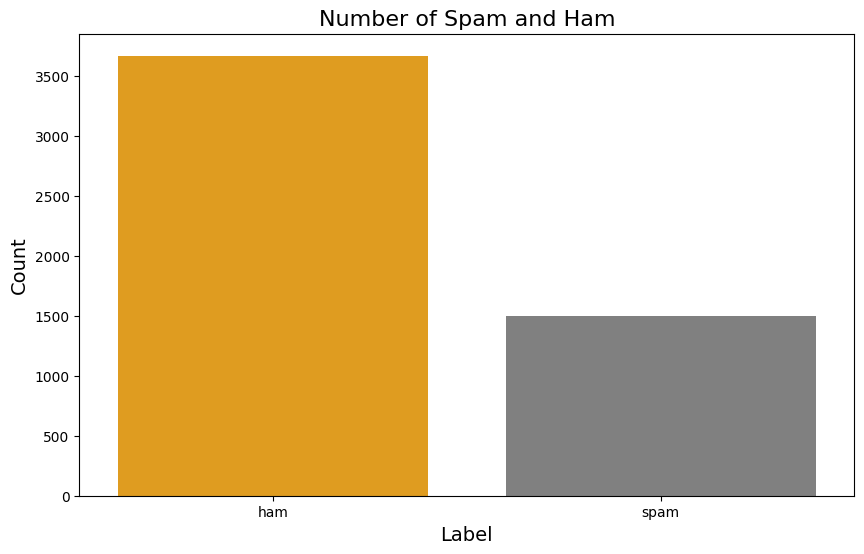

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for labels
color = {"ham": "orange", "spam": "grey"}

# Set up figure size correctly
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=data, x='label', palette=color)

# Set titles and labels
plt.title('Number of Spam and Ham', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Optional: Remove gridlines
plt.grid(False)

# Show the plot
plt.show()


**Visualizing Length of Mails**

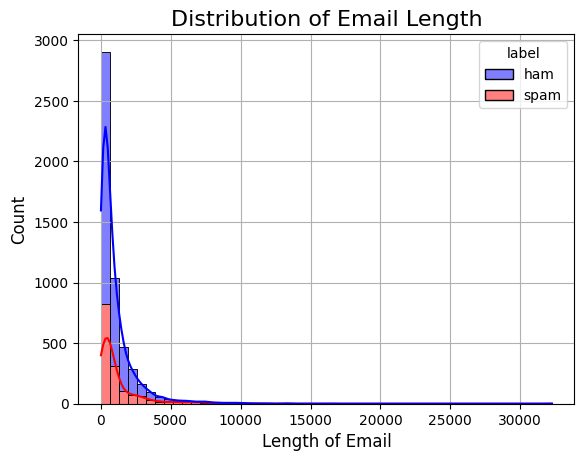

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the length column
data['length'] = data['text'].apply(len)

# Define custom colors for spam and ham
custom_palette = {
    'spam': 'red',
    'ham': 'blue'
}

# Plot with color change
sns.histplot(
    data=data,
    x='length',
    hue='label',
    multiple='stack',
    bins=50,
    kde=True,
    palette=custom_palette
)

plt.title('Distribution of Email Length', fontsize=16)
plt.xlabel('Length of Email', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()


**Visualizing common words in spam and ham emails**

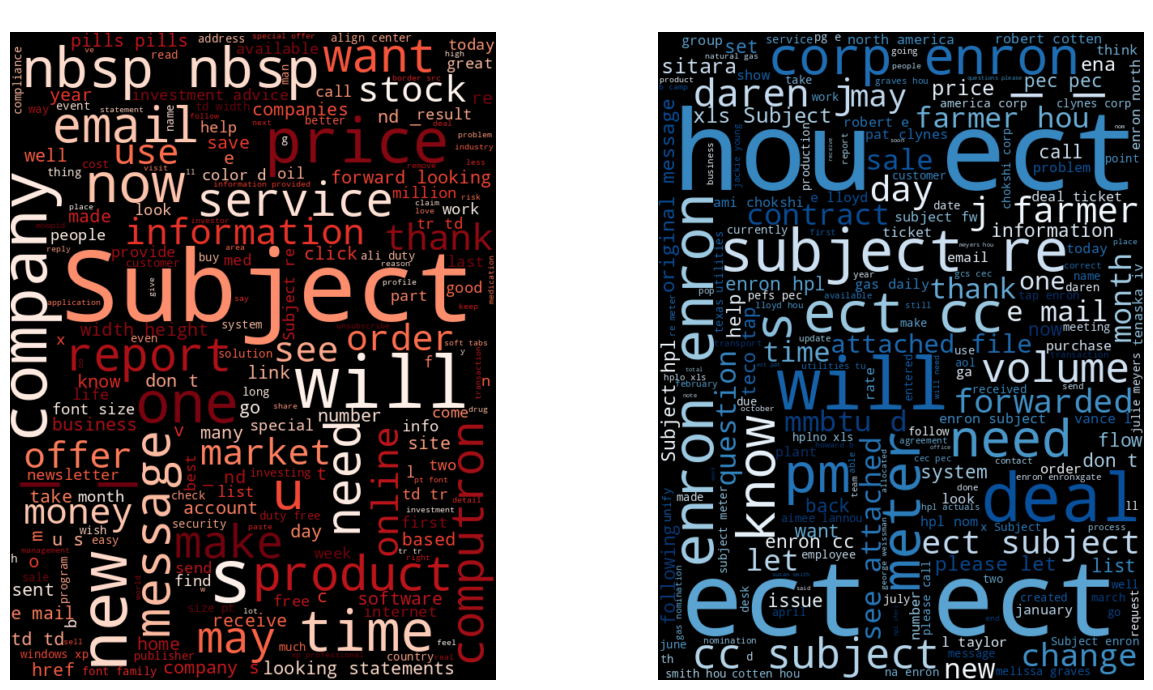

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Prepare text for spam and ham
spam_text = ' '.join(data[data['label'] == 'spam']['text'])
ham_text = ' '.join(data[data['label'] == 'ham']['text'])

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word clouds
spam_wordcloud = WordCloud(
    width=600, height=800, background_color='black', stopwords=stopwords, colormap='Reds'
).generate(spam_text)

ham_wordcloud = WordCloud(
    width=600, height=800, background_color='black', stopwords=stopwords, colormap='Blues'
).generate(ham_text)

# Set up figure
plt.figure(figsize=(14, 7))

# Spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Emails', fontdict={'fontsize':12, 'color': 'white'})

# Ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Emails', fontdict={'fontsize':12, 'color': 'white'})

# Show plots
plt.tight_layout()
plt.show()


In [12]:
x = data['text']
x

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [13]:
y = data['label']
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4136,), (1035,), (4136,), (1035,))

In [15]:
model = Pipeline([('vectorizer',CountVectorizer(stop_words='english')),('classifier',MultinomialNB())])

In [16]:
model.fit(x_train,y_train)


Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [17]:
y_pred = model.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [18]:
print('Accuracy:',accuracy_score(y_test,y_pred))

print('Precesion:',precision_score(y_test,y_pred,pos_label='spam'))

print('Recall;',recall_score(y_test,y_pred,pos_label='spam'))

print('F1-Score:',f1_score(y_test,y_pred,pos_label='spam'))

Accuracy: 0.9710144927536232
Precesion: 0.9518900343642611
Recall; 0.9453924914675768
F1-Score: 0.9486301369863014


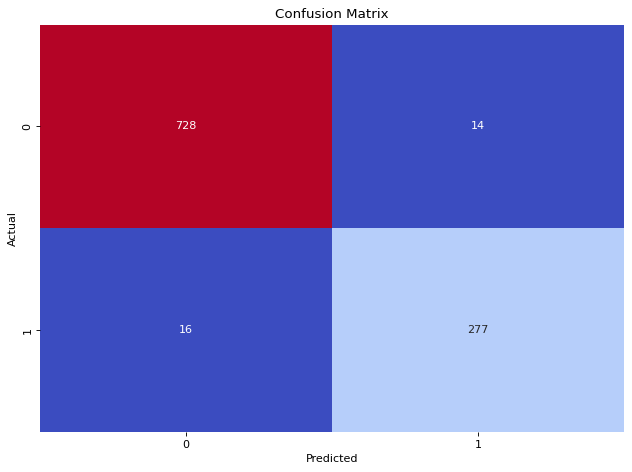

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [20]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.95      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



**TEST MODEL**

In [21]:
msg1 = ["Congratulations! You've been selected for a free gift card. Act now to receive it!"]
msg2 = ["Heading to the market now. Want me to grab something for you?"]
msg3 = ["Stuck in traffic! Will arrive at the office in about 10 minutes."]

In [22]:
print(model.predict(msg1))
print(model.predict(msg2))
print(model.predict(msg3))

['spam']
['spam']
['spam']
